# Interactive peak search
Try running it in a live notebook for animation!

In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
np.random.seed(0)

import lightlab.util.sweep as sUtil

In [2]:
livePlots = False

Text(0.5,1,'Poor, low-res sampling of underlying peak')

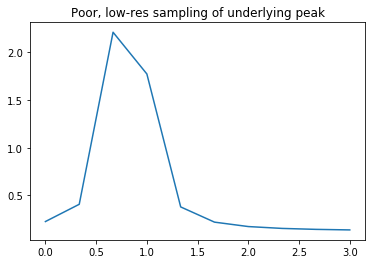

In [3]:
def myPeakedFun(x):
    x0 = .82
    fwhm = .2
    amp = 7
    noise = amp * 1e-2
    y = amp / (1 + (2 * (x - x0) / fwhm) ** 2) + noise * np.random.randn()
    return y
xq = np.linspace(0,3, 10)
plt.plot(xq, myPeakedFun(xq))
plt.title('Poor, low-res sampling of underlying peak')

In [4]:
xPeak, yPeak = sUtil.peakSearch(evalPointFun=myPeakedFun, startBounds=[0,3],
                         nSwarm=3, xTol=.001, livePlot=livePlots)
print(xPeak, yPeak)

Detected positive curvature
Detected positive curvature
Converged on peak
0.8154887471038466 7.01286612665231


## Interactive peak descent through binary search

In [5]:
rightBounds = [xPeak, 3]
leftBounds = [0, xPeak]
xRightHalf = sUtil.binarySearch(evalPointFun=myPeakedFun, targetY=0.5*yPeak, 
                                startBounds=rightBounds,
                                xTol=.001,
                                livePlot=livePlots)
xLeftHalf = sUtil.binarySearch(evalPointFun=myPeakedFun, targetY=0.5*yPeak, 
                                startBounds=leftBounds,
                                xTol=.001,
                                livePlot=livePlots)
print('Left:', xLeftHalf)
print('Right:', xRightHalf)

Left: 0.719127283823021
Right: 0.9194876959111586
